### Import required libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Import / Read Data

In [150]:
df = pd.read_csv('data_clean.csv')
df.shape

(158, 10)

### EDA

In [151]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [152]:
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [154]:
df.describe(include='all')

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
count,158.000000,120.000000,151.000000,158.000000,158,158,158.000000,158.0,158.000000,155
unique,NaN,NaN,NaN,NaN,41,6,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,81,9,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,11,34,NaN,NaN,NaN,59
mean,79.500000,41.583333,185.403974,9.957595,NaN,NaN,16.006329,2010.0,77.727848,NaN
std,45.754781,32.620709,88.723103,3.511261,NaN,NaN,8.997166,0.0,9.377877,NaN
min,1.000000,1.000000,7.000000,1.700000,NaN,NaN,1.000000,2010.0,56.000000,NaN
25%,40.250000,18.000000,119.000000,7.400000,NaN,NaN,8.000000,2010.0,72.000000,NaN
50%,79.500000,30.500000,197.000000,9.700000,NaN,NaN,16.000000,2010.0,78.500000,NaN
75%,118.750000,61.500000,257.000000,11.875000,NaN,NaN,24.000000,2010.0,84.000000,NaN


In [155]:
df.isna().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [156]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [157]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [158]:
df['Weather'].unique()

array(['S', 'C', 'PS', nan], dtype=object)

In [159]:
df['Year'].unique()

array([2010])

In [160]:
df['Temp'].unique()

array([67, 72, 74, 62, 56, 66, 65, 59, 61, 69, 68, 58, 64, 57, 73, 81, 79,
       76, 78, 84, 85, 82, 87, 90, 93, 92, 80, 77, 75, 83, 88, 89, 91, 86,
       97, 94, 96, 71, 63, 70])

In [161]:
df[['Temp','Temp C']]

,Temp,Temp C
0,67,67
1,72,72
2,74,74
3,62,62
4,56,56
...,...,...
153,67,67
154,70,70
155,77,77
156,75,75


In [162]:
df.drop(['Unnamed: 0','Temp C'],axis=1)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


[]

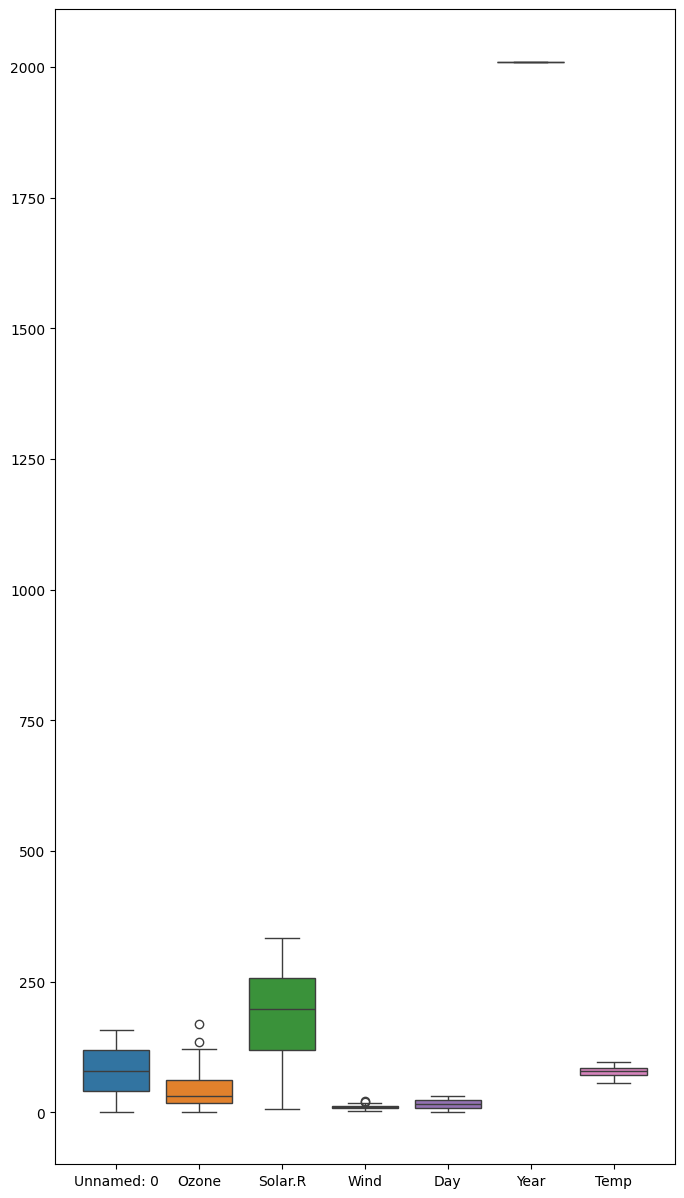

In [163]:
## check for ouliers in dataset
plt.figure(figsize=(8,15))
sns.boxplot(df.select_dtypes(np.number))
plt.plot()

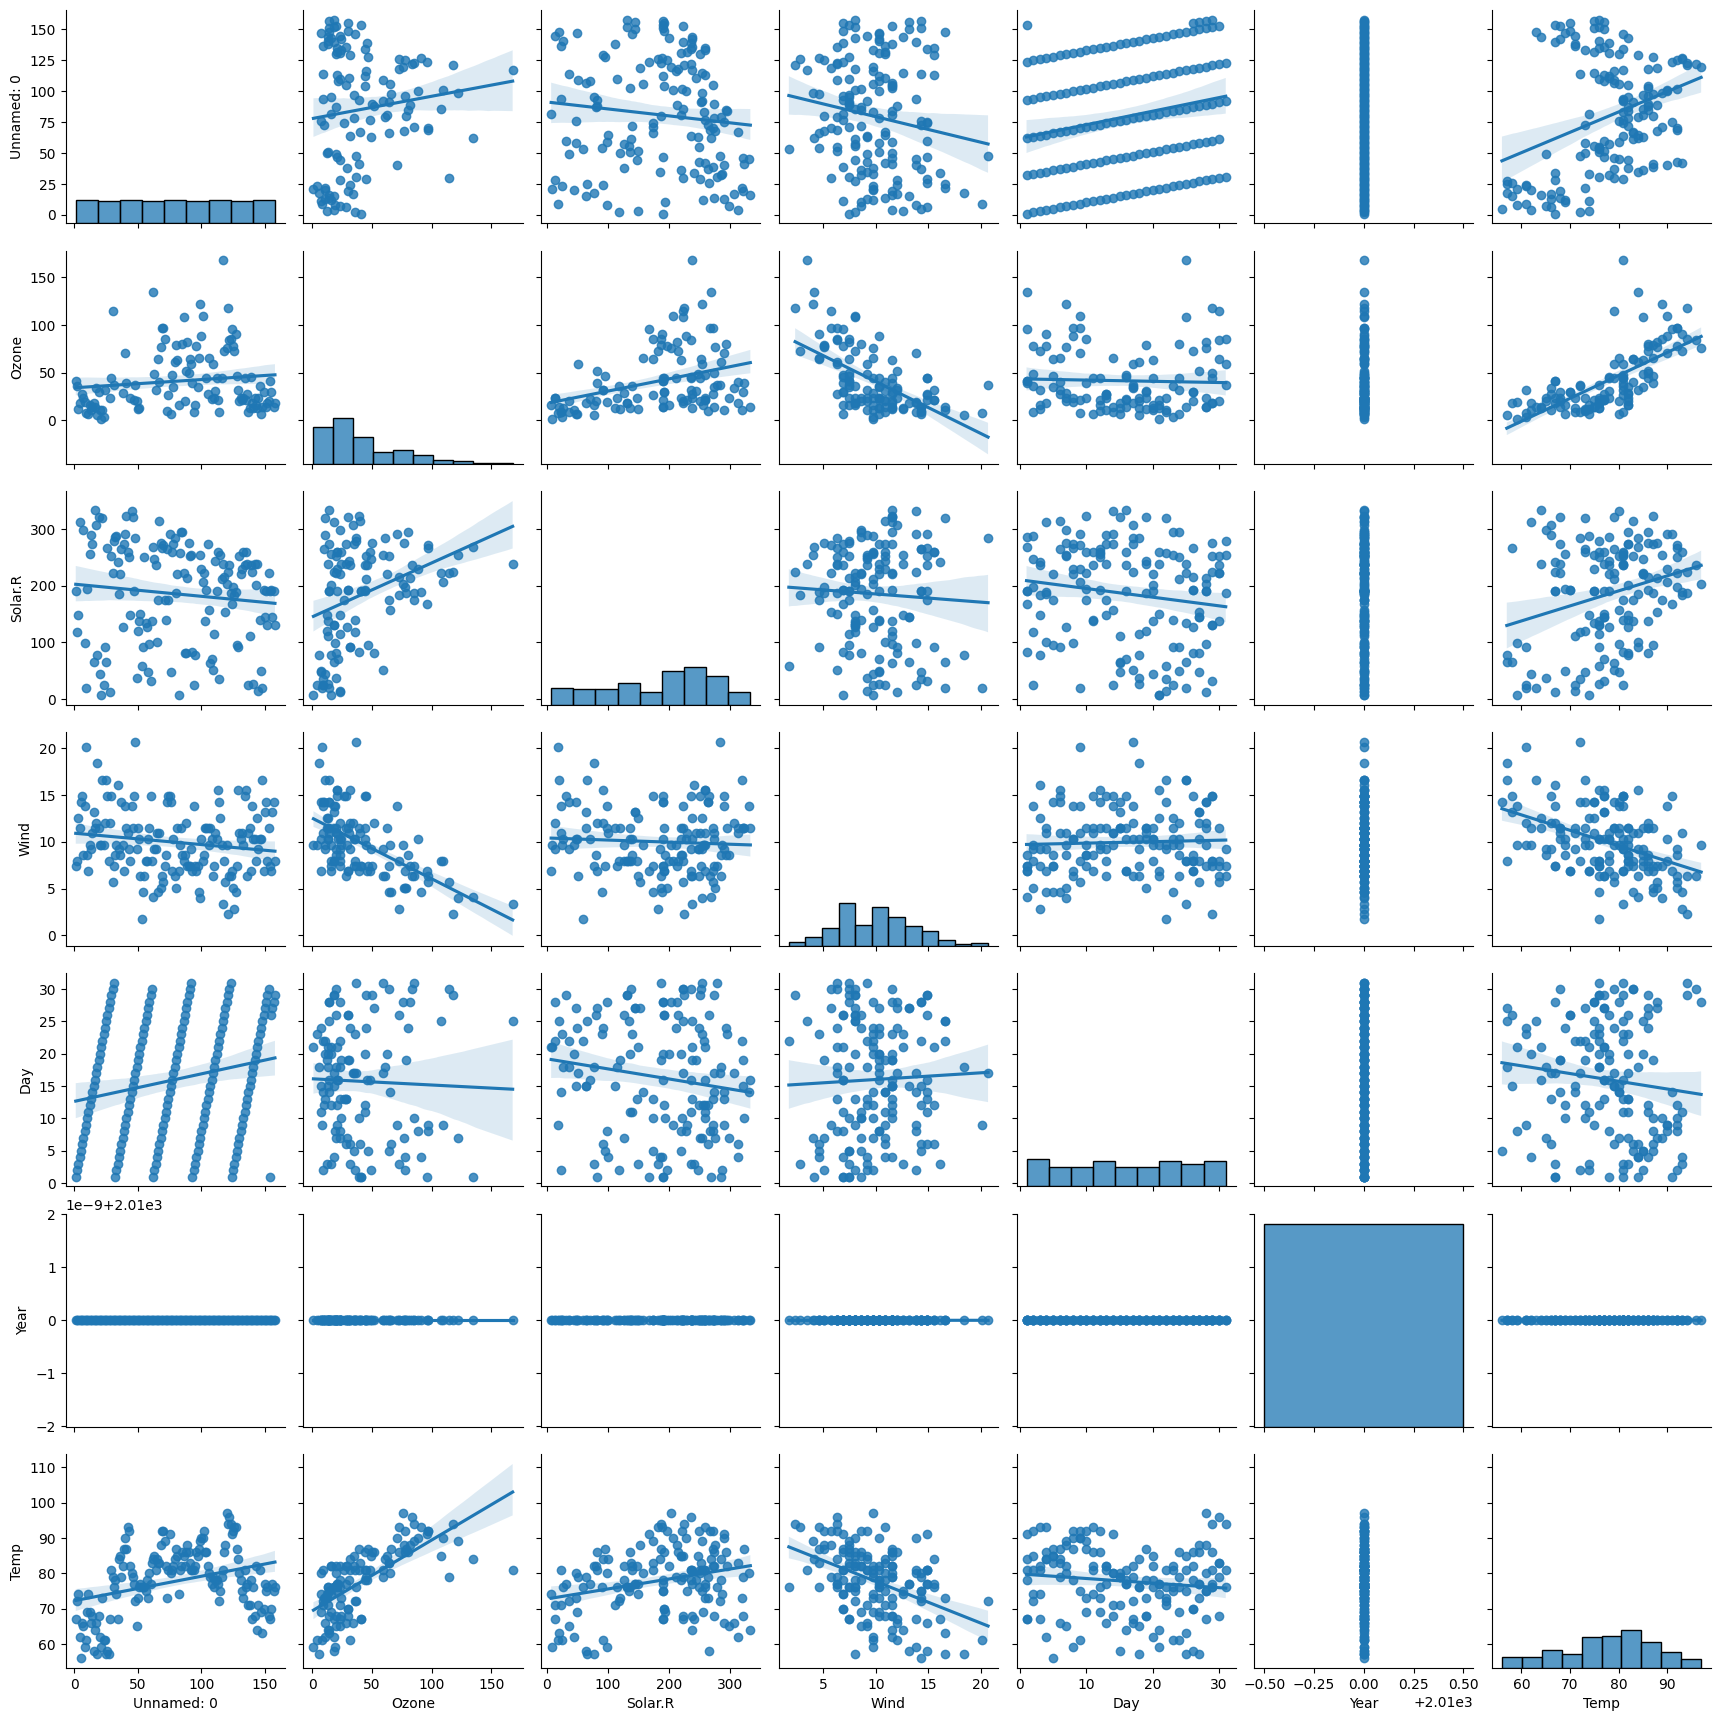

In [164]:
sns.pairplot(df,kind = 'reg')
plt.show()

### Data Preprocessing

In [165]:
## Missing value imputation
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].median())
df['Solar'] = df['Solar.R'].fillna(df['Solar.R'].mean())
df['Weather'] = df['Weather'].fillna(df['Weather'].mode())

In [166]:
df.drop('Solar.R',axis=1,inplace=True)

In [167]:
df.isna().sum()

Unnamed: 0    0
Ozone         0
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
Solar         0
dtype: int64

In [168]:
df.head()

,Unnamed: 0,Ozone,Wind,Temp C,Month,Day,Year,Temp,Weather,Solar
0,1,41.0,7.4,67,5,1,2010,67,S,190.000000
1,2,36.0,8.0,72,5,2,2010,72,C,118.000000
2,3,12.0,12.6,74,5,3,2010,74,PS,149.000000
3,4,18.0,11.5,62,5,4,2010,62,S,313.000000
4,5,30.5,14.3,56,5,5,2010,56,S,185.403974


In [169]:
df.drop(['Unnamed: 0','Temp C'],axis=1,inplace=True)

In [170]:
## missing values has been replaced, now there are no null values in our dataset

In [171]:
##replace string with number
df['Month'].mask(df['Month'] == 'May', 5, inplace=True)


C:\Users\jayes\AppData\Local\Temp\ipykernel_7896\4076885855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].mask(df['Month'] == 'May', 5, inplace=True)


In [178]:
df.head()

,Ozone,Wind,Month,Day,Year,Temp,Weather,Solar
0,41.0,7.4,5,1,2010,67,S,190.000000
1,36.0,8.0,5,2,2010,72,C,118.000000
2,12.0,12.6,5,3,2010,74,PS,149.000000
3,18.0,11.5,5,4,2010,62,S,313.000000
4,30.5,14.3,5,5,2010,56,S,185.403974


In [172]:
##changing datatype
df['Month'] = df['Month'].astype(int)

In [182]:
df['Weather']=df['Weather'].astype('category')

In [183]:
df.dtypes

Ozone       float64
Wind        float64
Month         int64
Day           int64
Year          int64
Temp          int64
Weather    category
Solar       float64
dtype: object

In [187]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(np.number))

In [191]:
encoded = pd.get_dummies(df['Weather'])

,C,PS,S
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
153,True,False,False
154,False,True,False
155,False,False,True
156,False,False,True
